In [50]:
"""
香农熵：
    在信息论中，熵是接收的每条消息中包含的信息的平均量，又被称为信息熵、信源熵、平均自信息量。这里， 消息代表来自分布或数据流中的事件、样本或特征。
    （熵最好理解为不确定性的量度而不是确定性的量度，因为越随机的信源的熵越大。）
    
决策树：
    1、计算当前的信息熵HB，计算每个特征的信息熵的期望Hi，选择能使HB-Hi最大的那个
    特征作为这次的分类特征。(能否理解为每次选择熵减少最多的方向)
    2、直到无法分类为止，只有一个类别了或则所有特征都用作分类了
    
    
对于决策树的理解：
    决策树，就是为了更好的进行分类。那么怎样的分类才比较好呢（选择什么属性来分），
    在进行分类的时候，我们当然是想每个分类里面的个体都是比较相近的，即比较纯的。
    
    在前面我们已经了解到，熵可以反映系统的有序程度。熵越大，代表系统越无序(不纯)。熵越小
    代表系统越有序(纯)。所以引进信息熵来描述系统的纯度。
    
    有那么多的属性，选择哪个属性分的类更纯呢。所以我们需要计算连个值，一个是系统当前
    的熵，第二个是按某个属性划分的子系统的熵的期望(条件熵：属性便是条件)。选择能使
    熵 减 条件熵 的 值最大的属性作为当前系统的分类属性。
"""

'\n香农熵：\n    \n    \n决策树：\n    每次选择当前信息熵的期望最大的特征，按该特征值进行分类。\n    直到无法分类为止，只有一个类别了或则所有特征都用作分类了\n'

In [51]:
from math import log

In [52]:
# 计算信息期望值，熵
def calcShannonEnt(dataSet):
    numEntries = len(dataSet)
    labelCounts = {}
    for featVec in dataSet:
        currentLabel = featVec[-1]
        if currentLabel not in labelCounts.keys():
            labelCounts[currentLabel] = 0
        labelCounts[currentLabel] += 1
    shannonEnt = 0.0
    for key in labelCounts:
        prob = float(labelCounts[key]) / numEntries
        shannonEnt -= prob * log(prob, 2)
    return shannonEnt

In [53]:
def createDataSet():
    dataSet = [[1, 1, 'yes'],
              [1, 1, 'yes'],
              [1, 0, 'no'],
              [0, 1, 'no'],
              [0, 1, 'no']]
    labels = ['no surfacing', 'flippers']
    return dataSet, labels

In [54]:
myDat, labels = createDataSet()
myDat

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]

In [55]:
labels

['no surfacing', 'flippers']

In [56]:
calcShannonEnt(myDat)

0.9709505944546686

In [57]:
# 得到了度量熵，就可以按照获取最大信息增益的方法划分数据集
# 引入了基尼不纯度，简单说是从一个数据集中随机选取子项，度量其被错误分类到其他分组里的概率

"""
分类算法除了需要测量信息熵，还需要划分数据集合，度量划分数据集合的熵，以便判断当前是否正确划分了数据集。
我们对每个特征划分数据集的结果计算一次信息熵，然后判断按照哪个特征划分数据集是最好的划分方式。
"""
# dataSet 待划分的数据集
# axis 划分数据集的特征
# value 需要返回的特征的值 
def splitDataSet(dataSet, axis, value):
    retDataSet = []
    for featVec in dataSet:
        if featVec[axis] == value:
            # 也就是把除了featVec[axis]的特征值，全部加入到reducedFeatVec
            reducedFeatVec = featVec[:axis]
            reducedFeatVec.extend(featVec[axis+1:])
            retDataSet.append(reducedFeatVec)
    return retDataSet

In [58]:
myDat, labels = createDataSet()
myDat

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]

In [59]:
splitDataSet(myDat, 0, 1)

[[1, 'yes'], [1, 'yes'], [0, 'no']]

In [60]:
# 通过对每个特征值进行的分类，计算香农熵，进而确定数据集的最好划分方式
def chooseBestFeatureToSplit(dataSet):
    # 最后一个是标签，所以要减掉1才是属性个数
    numFeatures = len(dataSet[0]) - 1
    # 计算初始香农熵
    baseEntropy = calcShannonEnt(dataSet)
    bestInfoGain = 0.0
    bestFeature = -1
    for i in range(numFeatures):
        # 创建唯一的分类标签列表
        featList = [example[i] for example in dataSet]
#         获取特征值种类
        uniqueVals = set(featList)
        newEntropy = 0.0
        # 计算每种划分方式的信息熵
        for value in uniqueVals:
            subDataSet = splitDataSet(dataSet, i, value)
            prob = len(subDataSet)/float(len(dataSet))
            newEntropy += prob * calcShannonEnt(subDataSet)
        # 计算香农熵的增益
        infoGain = baseEntropy - newEntropy
        print(baseEntropy)
        # 记录最好的信息增益
        if (infoGain > bestInfoGain):
            bestInfoGain = infoGain
            bestFeature = i
    return bestFeature

In [61]:
myDat, labels = createDataSet()
myDat

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]

In [62]:
chooseBestFeatureToSplit(myDat)

0.9709505944546686
0.9709505944546686


0

In [63]:
myDat

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]

In [64]:
import operator

# 统计条目出现次数，输出最大值对应的条目
def majorityCnt(classList):
    classCount = {}
    for vote in classList:
        if vote not in classCount.keys() : classCount[vote] = 0
        classCount[vote] += 1
    # 根据字典的值进行排序，输出列表
    sortedClassCount = sorted(classCount.items(), \
                             key=operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0]

In [65]:
# 利用字典来递归建立树，字典的值可以是字典，即子树
def createTree(dataSet, labels):
    classList = [example[-1] for example in dataSet]
    
    # 类别完全相同，则停止继续划分
    if classList.count(classList[0]) == len(classList):
        return classList[0]
    
    # 遍历万所有特征时，返回出现次数最多的
    if len(dataSet[0]) == 1:
        return majorityCnt(classList)
    
    # 选择最好的分类特征
    bestFeat = chooseBestFeatureToSplit(dataSet)
    bestFeatLabel = labels[bestFeat]
    myTree = {bestFeatLabel:{}}
    del(labels[bestFeat])
    # 得到列表包含的所有属性值
    featValues = {example[bestFeat] for example in dataSet}
    uniqueVals = set(featValues)
    for value in uniqueVals:
        subLabels = labels[:]
        myTree[bestFeatLabel][value] = createTree(splitDataSet\
                                                 (dataSet, bestFeat, value), subLabels)
    return myTree

In [66]:
myDat, labels = createDataSet()
myTree = createTree(myDat, labels)
myTree

0.9709505944546686
0.9709505944546686
0.9182958340544896


{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

In [67]:
"""
使用matplotlib注解
"""
%matplotlib inline
import matplotlib.pyplot as plt
# 解决中文乱码问题
import matplotlib.font_manager as fm
myfont = fm.FontProperties(fname='C:/Windows/Fonts/msyh.ttc')

In [68]:
decisionNode = dict(boxstyle="sawtooth", fc="0.8")
leafNode = dict(boxstyle="round4", fc="0.8")
arrow_args = dict(arrowstyle="<-")
def plotNode(nodeTxt, centerPt, parentPt, nodeType):
    """
    nodeTxt, 显示的文本
    centerPt, 文本的中心位置
    parentPt, 箭头起点的坐标
    nodeType, 是一个字典，注解的形状
    """
    # , fontproperties=myfont  自定义字体解决中文乱码问题
    createPlot.ax1.annotate(nodeTxt, xy=parentPt,  xycoords='axes fraction',
             xytext=centerPt, textcoords='axes fraction',
             va="center", ha="center", bbox=nodeType, arrowprops=arrow_args , fontproperties=myfont)
    
def createPlot():
    fig = plt.figure(1, facecolor='white')
    fig.clf()
    createPlot.ax1 = plt.subplot(111, frameon=False) #ticks for demo puropses 
    # 中文会乱码
    plotNode('决策节点', (0.5, 0.1), (0.1, 0.5), decisionNode)
    plotNode('叶节点', (0.8, 0.1), (0.3, 0.8), leafNode)
    plt.show()

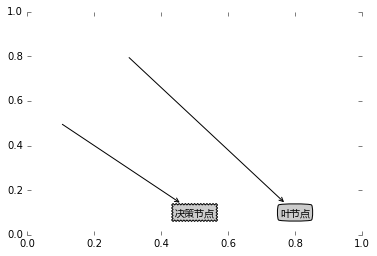

In [69]:
createPlot()

In [70]:
"""
绘制一棵树，我们需要知道树的层数（高度），树的叶子节点数目，才能比较好的规划绘图的空间
"""

# 求叶子节点数目
def getNumLeafs(myTree):
    numLeafs = 0
    firstStr = list(myTree.keys())[0]
    secondDict = myTree[firstStr]
    # 获取下一个节点，判断是子树还是叶子，叶子则返回，子树则递归找叶子
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':#test to see if the nodes are dictonaires, if not they are leaf nodes
            numLeafs += getNumLeafs(secondDict[key])
        else:   numLeafs +=1
    return numLeafs

# 求树的高度
def getTreeDepth(myTree):
    maxDepth = 0
    firstStr = list(myTree.keys())[0]
    secondDict = myTree[firstStr]
    # 获取下一个节点， 如果是叶子，那么当前层数是1，如果是子数，当前层数先加一，然后递归找子树的层数。
    # maxDepth用来比较子树的层数的，返回最大的层数
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':#test to see if the nodes are dictonaires, if not they are leaf nodes
            thisDepth = 1 + getTreeDepth(secondDict[key])
        else:   thisDepth = 1
        if thisDepth > maxDepth: maxDepth = thisDepth
    return maxDepth

In [71]:
"""
小测试数据
"""
def retrieveTree(i):
    listOfTrees =[{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}},
                  {'no surfacing': {0: 'no', 1: {'flippers': {0: {'head': {0: 'no', 1: 'yes'}}, 1: 'no'}}}}
                  ]
    return listOfTrees[i]

In [72]:
mytree = retrieveTree(0)
mytree

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

In [73]:
getNumLeafs(mytree)

3

In [74]:
getTreeDepth(mytree)

2

In [75]:
# 绘制边上的文本信息，在节点连线的中点绘制文本信息
def plotMidText(cntrPt, parentPt, txtString):
    xMid = (parentPt[0]-cntrPt[0])/2.0 + cntrPt[0]
    yMid = (parentPt[1]-cntrPt[1])/2.0 + cntrPt[1]
    createPlot.ax1.text(xMid, yMid, txtString, va="center", ha="center", rotation=30)


# 递归的绘制子决策树
def plotTree(myTree, parentPt, nodeTxt):#if the first key tells you what feat was split on
    numLeafs = getNumLeafs(myTree)  #this determines the x width of this tree
    depth = getTreeDepth(myTree)
    firstStr = list(myTree.keys())[0]     #the text label for this node should be this
    cntrPt = (plotTree.xOff + (1.0 + float(numLeafs))/2.0/plotTree.totalW, plotTree.yOff)
    plotMidText(cntrPt, parentPt, nodeTxt)
    plotNode(firstStr, cntrPt, parentPt, decisionNode)
    secondDict = myTree[firstStr]
    plotTree.yOff = plotTree.yOff - 1.0/plotTree.totalD
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':#test to see if the nodes are dictonaires, if not they are leaf nodes   
            plotTree(secondDict[key],cntrPt,str(key))        #recursion
        else:   #it's a leaf node print the leaf node
            plotTree.xOff = plotTree.xOff + 1.0/plotTree.totalW
            plotNode(secondDict[key], (plotTree.xOff, plotTree.yOff), cntrPt, leafNode)
            plotMidText((plotTree.xOff, plotTree.yOff), cntrPt, str(key))
    plotTree.yOff = plotTree.yOff + 1.0/plotTree.totalD
    

# 绘制决策树
def createPlot(inTree):
    # 创建画布
    fig = plt.figure(1, facecolor='white')
    fig.clf()
    axprops = dict(xticks=[], yticks=[])
    createPlot.ax1 = plt.subplot(111, frameon=False, **axprops)    #no ticks
    #createPlot.ax1 = plt.subplot(111, frameon=False) #ticks for demo puropses 
    # 全局变量，存储树的宽度
    plotTree.totalW = float(getNumLeafs(inTree))
    # 全局变量，存储树的高度
    plotTree.totalD = float(getTreeDepth(inTree))
    # 全局变量，存储已经绘制的节点位置
    plotTree.xOff = -0.5/plotTree.totalW; plotTree.yOff = 1.0;
    plotTree(inTree, (0.5,1.0), '')
    plt.show()

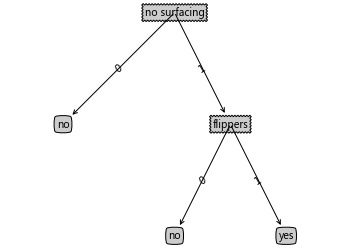

In [76]:
createPlot(mytree)

In [77]:
"""
测试算法
"""
def classify(inputTree,featLabels,testVec):
    # 根节点，特征名称
    firstStr = list(inputTree.keys())[0]
    # 根据特征名称，找到子树集合，特征值是字典的键，值就是下一个子树
    secondDict = inputTree[firstStr]
    # 根据特征名称，找到特征值所在的维度
    featIndex = featLabels.index(firstStr)
    # 根据特征值维度，获取测试数据的特征值
    key = testVec[featIndex]
    # 根据特征值找到子树
    valueOfFeat = secondDict[key]
    # 如果是子树则递归找，是叶子（结果）则可以返回结果了
    if isinstance(valueOfFeat, dict): 
        classLabel = classify(valueOfFeat, featLabels, testVec)
    else: classLabel = valueOfFeat
    return classLabel

In [78]:
myDat, labels = createDataSet()

In [79]:
myDat

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]

In [80]:
labels

['no surfacing', 'flippers']

In [81]:
myTree = retrieveTree(0)

In [82]:
myTree

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

In [83]:
# 假如myTree是训练出来的决策树，进行数据测试
classify(myTree, labels, [1, 0])

'no'

In [84]:
classify(myTree, labels, [0, 1])

'no'

In [85]:
# 构造决策树很费时间，所以将构造好的决策树保存下来供下次分析使用

# 保存决策树
def storeTree(inputTree,filename):
    import pickle
    fw = open(filename,'wb')
    pickle.dump(inputTree,fw)
    fw.close()
    
# 读取决策树
def grabTree(filename):
    import pickle
    fr = open(filename, 'rb')
    return pickle.load(fr)

In [86]:
storeTree(myTree, 'classifierStorage.txt')

In [87]:
grabTree('classifierStorage.txt')

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

In [88]:
"""
使用决策树预测隐形眼镜类型
收集数据：提供的文本文件
准备数据：解析tab键分隔的数据行
分析数据：快速检查数据，确保正确的解析数据内容，使用creatPlot()函数绘制最终的树形图
训练算法：使用上面的createTree()函数
测试算法：编写测试函数验证决策树可以正确分类给定的数据实例
使用算法：存储树的数据结构，以便下次使用时无需重新构造树
"""

'\n使用决策树预测隐形眼镜类型\n收集数据：提供的文本文件\n准备数据：解析tab键分隔的数据行\n分析数据：快速检查数据，确保正确的解析数据内容，使用creatPlot()函数绘制最终的树形图\n训练算法：使用上面的createTree()函数\n测试算法：编写测试函数验证决策树可以正确分类给定的数据实例\n使用算法：存储树的数据结构，以便下次使用时无需重新构造树\n'

In [89]:
fr = open('lenses.txt')
lenses = [lnst.strip().split('\t') for lnst in fr.readlines()]
lensesLabels = ['age', 'prescript', 'astigmatic', 'tearRate']
lensesTree = createTree(lenses, lensesLabels)
lensesTree

1.3260875253642983
1.3260875253642983
1.3260875253642983
1.3260875253642983
1.5545851693377994
1.5545851693377994
1.5545851693377994
0.6500224216483541
0.6500224216483541
1.0
0.9182958340544896
0.9182958340544896
0.9182958340544896


{'tearRate': {'normal': {'astigmatic': {'no': {'age': {'pre': 'soft',
      'presbyopic': {'prescript': {'hyper': 'soft', 'myope': 'no lenses'}},
      'young': 'soft'}},
    'yes': {'prescript': {'hyper': {'age': {'pre': 'no lenses',
        'presbyopic': 'no lenses',
        'young': 'hard'}},
      'myope': 'hard'}}}},
  'reduced': 'no lenses'}}

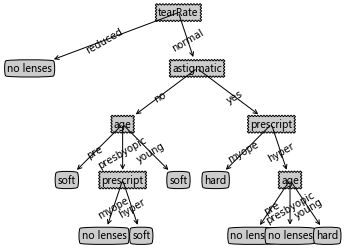

In [90]:
# 为了方便看到决策树的样子，使用上面的createPlot()绘制出来
createPlot(lensesTree)